In [33]:
import pickle
import pandas as pd
import numpy as np
from sklearn.cross_validation  import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm
import os

In [6]:
os.getcwd()

'H:\\Advance Data Science\\Midterm'

In [5]:
os.chdir("H:\Advance Data Science\Midterm")

In [7]:
QuarterData1 = pd.read_csv('Sample_Orgination_Validated_2005.csv',index_col=None)

C:\Users\sweta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#QuarterData1.dtypes

LOAN_SEQUENCE_NUMBER                        object
MONTHLY_REPORTING_PERIOD                     int64
CURRENT_ACTUAL_UPB                         float64
CURRENT_LOAN_DELINQUENCY_STATUS             object
LOAN_AGE                                     int64
REMAINING_MONTHS_TO_LEGAL_MATURITY           int64
REPURCHASE_FLAG                             object
MODIFICATION_FLAG                           object
ZERO_BALANCE_CODE                          float64
ZERO_BALANCE_EFFECTIVE_DATE                float64
CURRENT_INTEREST_RATE                      float64
CURRENT_DEFERRED_UPB                       float64
DUE_DATE_OF_LAST_PAID_INSTALLMENT_DDLPI    float64
MI_RECOVERIES                              float64
NET_SALES_PROCEEDS                          object
NON_MI_RECOVERIES                           object
EXPENSES                                   float64
Legal_Costs                                float64
Maintenance_and_Preservation_Costs         float64
Taxes_and_Insurance            

In [8]:
QD = QuarterData1

In [9]:
QD = QD.convert_objects(convert_numeric=True)

C:\Users\sweta\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [5]:
#pd.isnull(QD).sum() > 0

LOAN_SEQUENCE_NUMBER                       False
MONTHLY_REPORTING_PERIOD                   False
CURRENT_ACTUAL_UPB                         False
CURRENT_LOAN_DELINQUENCY_STATUS             True
LOAN_AGE                                   False
REMAINING_MONTHS_TO_LEGAL_MATURITY         False
REPURCHASE_FLAG                            False
MODIFICATION_FLAG                          False
ZERO_BALANCE_CODE                          False
ZERO_BALANCE_EFFECTIVE_DATE                False
CURRENT_INTEREST_RATE                      False
CURRENT_DEFERRED_UPB                       False
DUE_DATE_OF_LAST_PAID_INSTALLMENT_DDLPI    False
MI_RECOVERIES                              False
NET_SALES_PROCEEDS                          True
NON_MI_RECOVERIES                           True
EXPENSES                                   False
Legal_Costs                                False
Maintenance_and_Preservation_Costs         False
Taxes_and_Insurance                        False
Miscellaneous_Expens

In [10]:
QD['CURRENT_LOAN_DELINQUENCY_STATUS'].replace('nan',999,inplace=True)

In [11]:
QD['Deliquent'] = (QD.CURRENT_LOAN_DELINQUENCY_STATUS>0).astype(int)

In [12]:
QD['Deliquent'].unique()

array([0, 1], dtype=int64)

In [13]:
QD['ZERO_BALANCE_CODE'].unique()

array([ 0.,  1.,  6.,  9.,  3.])

In [14]:
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('Y',1)
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('U',0)
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('N',1)

QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('U',0)
QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('N',2)
QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('Y',1)

QD['EXPENSES'].fillna(0,inplace=True)
QD['NET_SALES_PROCEEDS'].fillna(0,inplace=True)
QD['NON_MI_RECOVERIES'].fillna(0,inplace=True)

In [15]:
QD.head()

,LOAN_SEQUENCE_NUMBER,MONTHLY_REPORTING_PERIOD,CURRENT_ACTUAL_UPB,CURRENT_LOAN_DELINQUENCY_STATUS,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,REPURCHASE_FLAG,MODIFICATION_FLAG,ZERO_BALANCE_CODE,ZERO_BALANCE_EFFECTIVE_DATE,...,MI_RECOVERIES,NET_SALES_PROCEEDS,NON_MI_RECOVERIES,EXPENSES,Legal_Costs,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Deliquent
0,F105Q1000064,200503,62000.0,0.0,0,360,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,F105Q1000064,200504,62000.0,0.0,1,359,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,F105Q1000064,200505,62000.0,0.0,2,358,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,F105Q1000064,200506,62000.0,0.0,3,357,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,F105Q1000064,200507,62000.0,0.0,4,356,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
QD['CURRENT_LOAN_DELINQUENCY_STATUS'].unique()

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,  999.,   15.,   16.,
         17.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,
         35.,   36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,
         44.,   45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,
         53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,
         80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  122.])

In [17]:
y =QD['Deliquent']
colsToKeep = ['LOAN_AGE','ZERO_BALANCE_CODE','REPURCHASE_FLAG','MODIFICATION_FLAG','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB','REMAINING_MONTHS_TO_LEGAL_MATURITY','NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation']
#'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE','CURRENT_DEFERRED_UPB','CURRENT_ACTUAL_UPB']
#'REMAINING_MONTHS_TO_LEGAL_MATURITY,'NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation'
X = QD[colsToKeep]

y = np.ravel(y)

In [18]:
Xtrain, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [19]:
clf = RandomForestClassifier(n_estimators=20,verbose =1,min_samples_split=2)
clf = clf.fit(Xtrain, y_train)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.3min finished


In [24]:
scores = cross_val_score(clf, X_test, y_test)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.6s finished


In [25]:
scores.mean() 

0.95231603787740149

In [26]:
pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.1s finished


In [27]:
metrics.accuracy_score(y_test,pred)

0.95306686898955251

In [28]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,843240,39353
1,2340,3416


In [29]:
preds = clf.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.2s finished


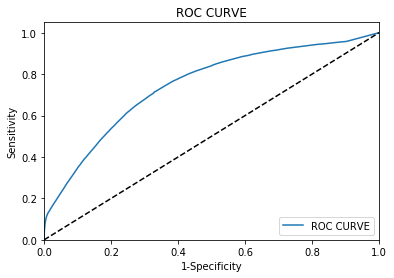

In [30]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [34]:
# save the model to disk
filename = 'RandomForest_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [36]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.95306686899


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.0s finished
